### Comparing Maximum Likelihood Estimation (MLE) and Ordinary Least Squares (OLS) results is a valuable practice in statistics and econometrics, because it helps to determine which method is more appropriate for data and research objectives.

# Maximum Likelihood Estimation

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [3]:
# create an independent variable
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-20.321528
1,-9.595960,-14.764595
2,-9.191919,-23.578474
3,-8.787879,-9.312673
4,-8.383838,-9.479473


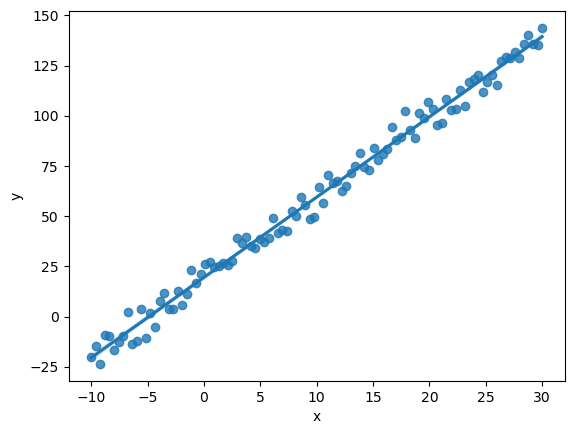

In [4]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

## Solve by OLS approach

In [5]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9085.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.96e-98
Time:                        09:20:49   Log-Likelihood:                -299.61
No. Observations:                 100   AIC:                             603.2
Df Residuals:                      98   BIC:                             608.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4832      0.644     30.244      0.000      18.205      20.762
x              3.9967      0.042     95.314      0.000       3.913       4.080
==============================================================================
Omnibus:                        5.981   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                2.729
Skew:                           0.046   Prob(JB):                        0.255
Kurtosis:                       2.196   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

4.841346950781973

## Solve by MLE approach

In [7]:
# MLE

def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

In [8]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 299.613151083237
        x: [ 1.948e+01  3.997e+00  4.841e+00]
      nit: 35
      jac: [ 5.684e-06 -1.023e-04  1.137e-05]
     nfev: 232
     njev: 58
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

### We can find that some of the parameters obtained through MLE is matching with that of the OLS approach.


### 

    Coefficient for the Constant/Intercept (const):
        MLE: 1.948e+01 (approximately 19.48)
        OLS: 19.4832

    Coefficient for the Independent Variable (x):
        MLE: 3.997e+00 (approximately 3.997)
        OLS: 3.9967

These matching coefficients represent the estimates for the intercept and the independent variable in the linear regression model. While the specific numerical values might differ slightly between MLE and OLS, they are quite close, indicating that the two methods have produced similar estimates for these model parameters.